## Sales Analysis

In [1]:
#importing necessary libraries

import pandas as pd
import os
import matplotlib.pyplot as plt

###### Firstly, merging 12 months of sales data into a single file

In [2]:
all_month_df = pd.DataFrame()
files = [file for file in os.listdir(r"C:\Users\user\Desktop\Ai Journey\Data science\Project\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]
for file in files:
    df = pd.read_csv(r"C:\Users\user\Desktop\Ai Journey\Data science\Project\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\" + file)
    all_month_df = pd.concat([all_month_df, df])

In [3]:
all_month_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
all_month_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


#### Cleaning up the data and augment data with additional columns

In [5]:
#Showing rows of NaN
nan_df = all_month_df[all_month_df.isnull().any(axis=1)]
#dropping the NaN from the data
all_month_df = all_month_df.dropna()

#Adding month column
all_month_df["Month"] = all_month_df["Order Date"].str[0:2]
#removing order date that is not record
all_month_df = all_month_df[all_month_df["Month"]!= "Or"]
#converting Month feature to integer
all_month_df["Month"] = all_month_df["Month"].astype("int64")

#converting columns to the necessary data type
all_month_df.dtypes
### This for Quantity ordered which is integer
all_month_df["Quantity Ordered"] = all_month_df["Quantity Ordered"].astype("int64")
### This for Price each which is float
all_month_df["Price Each"] = all_month_df["Price Each"].astype("float")


#adding a sales column
all_month_df["Sales"] = all_month_df["Quantity Ordered"] * all_month_df["Price Each"]
all_month_df.dtypes


C:\Users\user\AppData\Local\Temp\ipykernel_3080\463552603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_month_df["Month"] = all_month_df["Order Date"].str[0:2]
C:\Users\user\AppData\Local\Temp\ipykernel_3080\463552603.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_month_df["Month"] = all_month_df["Month"].astype("int64")
C:\Users\user\AppData\Local\Temp\ipykernel_3080\463552603.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
dtype: object

#### Analysing the best month for sales and the price

In [6]:
month_sales = all_month_df.groupby("Month").sum()

Text(0.5, 1.0, 'Month Sales Chart')

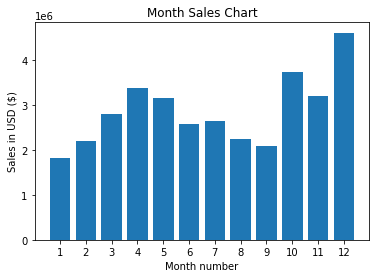

In [7]:
# Ploting the graph of month sales
months = range(1, 13)
plt.bar(months, month_sales["Sales"])
plt.xticks(months)
plt.xlabel("Month number")
plt.ylabel("Sales in USD ($)")
plt.title("Month Sales Chart")

#### Analysing the city highest number of sales

In [8]:
#Getting the city and state name
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]
all_month_df["City"] = all_month_df["Purchase Address"].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

In [9]:
#grouping the data by city
city_sales = all_month_df.groupby("City").sum()
city_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


Text(0.5, 1.0, 'City Sales Chart')

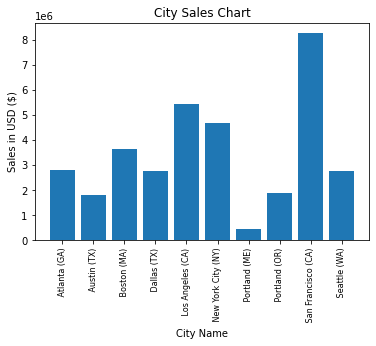

In [10]:
# Ploting the graph of city sales
cities = [city for city, df in all_month_df.groupby("City")]
plt.bar(cities, city_sales["Sales"])
plt.xticks(cities, rotation = "vertical", size= 8)
plt.xlabel("City Name")
plt.ylabel("Sales in USD ($)")
plt.title("City Sales Chart")

From the chart, San Francisco (CA) has alot of sales

##### Analysing advertisements to maximize likelihood of customer's buying product?

In [11]:
all_month_df["Order Date"] = pd.to_datetime(all_month_df["Order Date"])

In [12]:
all_month_df["Hour"] = all_month_df["Order Date"].dt.hour
all_month_df["Minute"] = all_month_df["Order Date"].dt.minute


In [13]:
all_month_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


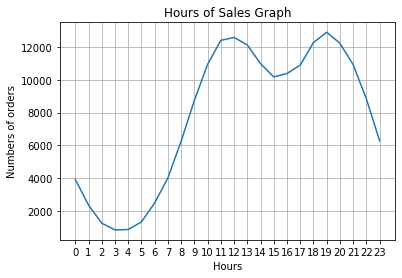

In [14]:
hours = [hour for hour, df in all_month_df.groupby("Hour")]
hour_count = all_month_df.groupby(["Hour"]).count()
plt.plot(hours,hour_count["Order ID"])
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Numbers of orders")
plt.grid()
plt.title("Hours of Sales Graph")
plt.show()

In [15]:
mm = all_month_df.groupby(["Hour"]).count()

In [16]:
all_month_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


#### Analysing products that are sold together

In [17]:
#getting all the order id that purchase product more than one
dupl = all_month_df[all_month_df["Order ID"].duplicated(keep=False)]
#Joining the duplicated Order ID products
dupl["Grouped"] = dupl.groupby("Order ID")["Product"].transform(lambda x : ", ".join(x))
#Droping the duplicate
dupl = dupl[["Order ID", "Grouped"]].drop_duplicates()
dupl

C:\Users\user\AppData\Local\Temp\ipykernel_3080\3358578936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupl["Grouped"] = dupl.groupby("Order ID")["Product"].transform(lambda x : ", ".join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


##### combining or counting all similar group of product sold together

In [18]:
from itertools import combinations
from collections import Counter

In [19]:
#counting function
count = Counter()
for row in dupl["Grouped"]:
    row_list = row.split(",")
    #counting 2 pairs of products
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


In [20]:
pd.DataFrame(count.most_common())

,0,1
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
...,...,...
351,"(AAA Batteries (4-pack), LG Dryer)",1
352,"(LG Dryer, 27in 4K Gaming Monitor)",1
353,"(LG Dryer, Lightning Charging Cable)",1
354,"(ThinkPad Laptop, LG Dryer)",1


#### What product sold the most? Why do you think it sold the most?

Text(0.5, 1.0, 'Products Quantity  Chart')

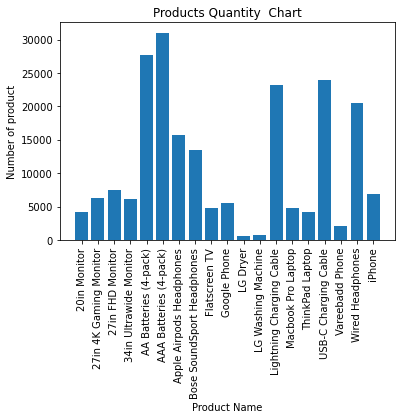

In [21]:
product_sum = all_month_df.groupby(["Product"]).sum()["Quantity Ordered"]
products= [product for product, df in all_month_df.groupby(["Product"])]
plt.bar(products, product_sum)
plt.xticks(products, rotation = "vertical", size = 10)
plt.xlabel("Product Name")
plt.ylabel("Number of product")
plt.title("Products Quantity  Chart")

In [22]:
all_month_df.groupby(["Product"], as_index = False).sum()

,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
0,20in Monitor,4129,451068.99,29336,454148.71,58764,122252
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
5,AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
6,Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
7,Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
8,Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789
9,Google Phone,5532,3315000.00,38305,3319200.00,79479,162773


C:\Users\user\AppData\Local\Temp\ipykernel_3080\2690451320.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = "vertical")


Text(0.5, 1.0, 'Product Quantity And its Avg price')

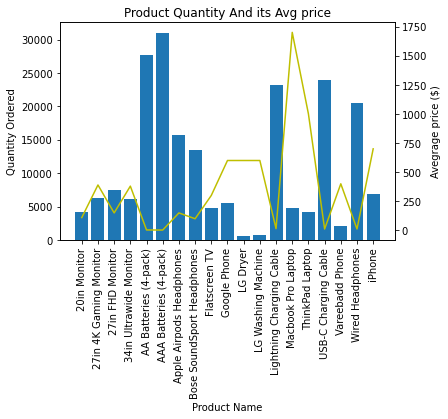

In [23]:
prices = all_month_df.groupby("Product").mean()["Price Each"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, product_sum)
ax1.set_xticklabels(products, rotation = "vertical")
ax2.plot(products, prices, "y")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Avegrage price ($)")
ax1.set_xlabel("Product Name")
ax1.set_title("Product Quantity And its Avg price")

In [24]:
all_month_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
 10  Minute            185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 17.0+ MB


In [25]:
all_month_df["Order Date"].min()

Timestamp('2019-01-01 03:07:00')

In [26]:
all_month_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30
